In [1]:
from IPython.display import Image,display,clear_output
from IPython.core.display import HTML 
import ipywidgets as widgets
from ipywidgets import interact, interactive,fixed, IntSlider, HBox, Layout, Output, VBox, HTML,HTMLMath, FloatSlider

import matplotlib.pyplot as plt
from numpy import *
from scipy import integrate
#import pylab as p
#import matplotlib.pyplot as p
#import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
HTML("""
<style>
body {
  counter-reset: section;                       /* Set a counter named 'section', and its initial value is 0. */
}
.container {
  position: relative;
  text-align: center;
  color: white;
}

.bottom-left {
  position: absolute;
  bottom: 8px;
  left: 16px;
}

.top-left {
  position: absolute;
  top: 8px;
  left: 16px;
}

.top-right {
  position: absolute;
  top: 8px;
  right: 16px;
}

.bottom-right {
  position: absolute;
  bottom: 8px;
  right: 16px;
}

.centered {
  position: absolute;
  top: 50%;
  left: 50%;
  transform: translate(-50%, -50%);
}



h3::before {
  counter-increment: section;                   /* Increment the value of section counter by 1 */
  content: "Section " counter(section) ": ";    /* Display the word 'Section ', the value of 
                                                   section counter, and a colon before the content
                                                   of each h3 */
}
</style>
    """)


HTML(value='\n<style>\nbody {\n  counter-reset: section;                       /* Set a counter named \'sectio…

In [3]:
from IPython.display import display, clear_output
from ipywidgets import interact, interactive,fixed, IntSlider, FloatSlider, HBox, Layout, Output, VBox, HTML,HTMLMath,Box,Text,link,FloatText
import numpy as np 
import matplotlib.pyplot as plt
from scipy import integrate
from numpy import *

HTML("""
<style>
.container {
  position: relative;
  text-align: center;
  color: white;
}

.bottom-left {
  position: absolute;
  bottom: 8px;
  left: 16px;
}

.top-left {
  position: absolute;
  top: 8px;
  left: 16px;
}

.top-right {
  position: absolute;
  top: 8px;
  right: 16px;
}

.bottom-right {
  position: absolute;
  bottom: 8px;
  right: 16px;
}

.centered {
  position: absolute;
  top: 50%;
  left: 50%;
  transform: translate(-50%, -50%);
}

</style>
    """)


HTML(value='\n<style>\n.container {\n  position: relative;\n  text-align: center;\n  color: white;\n}\n\n.bott…

The current situation in the world shows the importance of online and web-based learning. So instead of giving a presentation on how to solve a differential equation I will give a presentation about giving presentations, online and web-based, using jupyter labs.  

<html>
<body>   
<table style="width:100%;height:600px";>
<tr>
    <td style="background-color:#eeeeee;color:#5dade2;text-align:center";>
    <ul style="list-style-type:none;">    
        <li><img src="1200px-Jupyter_logo.svg.png",height=300, width=300 ></li>
        <li><font size="10"><centering>Jupyter notebooks in the (virtual) classroom</centering></font></li>
      </ul>  
    </td>
    <td style="background-color:#eeeeee;">
        <font size="5">
            What is jupyterlab?
        <ul> 
            <li>Web based user interface for open source web applications</li>
            <li> The main language of the interactive ju<b>py</b>ter environment is <b>Py</b>thon</li>
            <li>Create and share documents containing live code, equations, visualizations, etc</li>
            <li>Interactive data manipulation and visualization</li>
            <li>Tools for data analysis, programming, GUI creation, etc...</li>
            <li>Support for different programming languages and kernels (native support for programs like matlab, CFD solvers,etc)</li>
            <li>native $\LaTeX$ support</li>
        </ul>  
        </font>    
    </td>
</tr>
</table>
</body>
</html>    


In [5]:
# a very simple example of an interactive plot in python
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interactive,FloatSlider
import numpy as np

x=np.arange(0, 2.0*np.pi, 0.1)

def sinsol(Amplitude,Period):
    y = Amplitude*np.sin(Period*x)
    plt.plot(x,y)
    plt.show()

interactive_plot = interactive(sinsol,Amplitude=FloatSlider(min=0.1, max=2, step=0.1, value=1.0), Period=FloatSlider(min=0.1, max=2, step=0.1, value=1.0))

interactive_plot

interactive(children=(FloatSlider(value=1.0, description='Amplitude', max=2.0, min=0.1), FloatSlider(value=1.0…

An example of the power of jupyterlabs: The predator-prey model (Lotka-Volterra equations). real-time numerical solution of the model, with user interaction possible by modifying the coefficients using the sliders

In [9]:
%matplotlib inline

out = Output(layout={'width': '60%'})

def update_plot(a,b,c,d): 
    
    with out: 
        clear_output(wait=True)
        fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

        def dX_dt(X, t=0):
            """ Return the growth rate of fox and rabbit populations. """
            return array([ a*X[0] -   b*X[0]*X[1] ,     # rabbits
                           c*X[0]*X[1] -d*X[1] ])    # foxes
        t = linspace(0, 15,  1000)              # time
        X0 = array([10, 4])                     # initials conditions: 10 rabbits and 5 foxes
        X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
        rabbits, foxes = X.T        

        scat, = ax1.plot(t, rabbits,'r-',label='rabbits')
        scat, = ax1.plot(t, foxes,'b-',label='foxes')
        ax1.legend(loc='best')
        ax1.grid()
        ax1.set_title('Evolution of fox and rabbit populations',fontsize=18,fontweight='bold')
        ax1.set_xlabel('time [months]', fontsize=15,fontweight='bold')
        ax1.set_ylabel('population', fontsize=15,fontweight='bold')

        # we are on this line:
        # V = delta*x -gamma*ln(x) + beta*y - alpha*ln(y)
        our_V = c*X0[0] -d*log(X0[0]) + b*X0[1] - a*log(X0[1])
        # ---------------------------------------------------------
        values  = linspace(0.33, 2, 6)                          # position of the orbits around our initial conditions
        
                
        vcolors = plt.cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory
        #X_f0 = array([     0. ,  0.])
        X_f1 = array([ d/c, a/b])  # stable point (equilibrium)
        equil = "equilibrium point = (" + str(X_f1[0]) + "," + str(X_f1[1]) + ")"
    
        #------------------------------------------------------------------
        # plot trajectories
        for v, col in zip(values, vcolors):
        
            #X0 = v * X_f1                               # starting point
            X_0 = v*X0                               # starting point
            X = integrate.odeint( dX_dt, X_0, t)         # we don't need infodict here
            ax2.plot( X[:,0], X[:,1], lw=5.0, color=col, label='X0=(%.f, %.f)' % ( X_0[0], X_0[1]) )

        # location of the equilibrium point     
        ax2.plot(X_f1[0],X_f1[1],'o')    
        #-------------------------------------------------------
        # define a grid and compute direction at each point
        ymax = plt.ylim(ymin=0)[1]                        # get axis limits
        xmax = plt.xlim(xmin=0)[1]
        nb_points   = 20

        x = linspace(0, xmax, nb_points)
        y = linspace(0, ymax, nb_points)

        X1 , Y1  = meshgrid(x, y)                       # create a grid
        DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
        M = (hypot(DX1, DY1))                           # Norm of the growth rate 
        M[ M == 0] = 1.                                 # Avoid zero division errors 
        DX1 /= M                                        # Normalize each arrows
        DY1 /= M

        ax2.set_title('Trajectories and direction fields',fontsize=18,fontweight='bold')
        ax2.set_xlabel('Number of rabbits', fontsize=15,fontweight='bold')
        ax2.set_ylabel('Number of foxes',fontsize=15,fontweight='bold')
        Q=ax2.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.jet)
    
        fig.tight_layout()
        plt.show()
        fig.savefig('rabbits_and_foxes_1.png')

        
        
headertextbox = HTML(value="""
<div class="container">
<img src="https://raw.githubusercontent.com/bigfooted/covid19-seir/master/foxrabbit_header.png" alt="foxrabbits" style="width:100%;margin:-8px 0px">
   <div class="centered">
          <font size="10">
       Predator-Prey model
              </font> 
     </div>
</div>
    """)
   

textbox = HTMLMath(
value="""<body><font size="4"> 
         This is a demonstration of the predator-prey model, also known as the Lotka-Volterra model. <br>
         It describes the dynamics of biological systems in which two species interact, one as a predator and one as a prey. The system of equations is given by: <br><br> 
         $\\dot x = \\alpha x - \\beta xy$   <br>
         $\\dot y = \\delta xy - \\gamma y$  <br><br> 
       In this system of first order ODEs, <br>
       x = the number of rabbits, <br>
       y = the number of foxes, <br>
       $\\alpha$ = the (exponential) birthrate of the rabbits, <br>
       $\\beta$ = the deathrate of the rabbits by predation, <br>
       $\\delta$ = the birthrate of the foxes, <br>
       $\\gamma$ = the deathrate of the foxes. <br>
       </font>
       </body>
       """
    ,layout=Layout(width='30%')
)


layout=Layout(border='0px solid black', width='400px',height='50px')

style = {'description_width': '150px','width':'500px'}
sliderRabbitBirthrate = FloatSlider(min=0.1, max=2.0, step=0.1, value=1.5, description="Rabbit Birthrate:",orientation='horizontal',style=style,layout=layout) 
sliderRabbitDeathrate = FloatSlider(min=0.1, max=2.0, step=0.1, value=0.6, description="Rabbit Deathrate:",orientation='horizontal',style=style,layout=layout) 
sliderFoxBirthrate = FloatSlider(min=0.1, max=2.0, step=0.1, value=0.2,    description="Fox Birthrate :",orientation='horizontal',style=style,layout=layout) 
sliderFoxDeathrate = FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0,    description="Fox Deathrate :",orientation='horizontal',style=style,layout=layout) 

sliders = interactive(update_plot,a=sliderRabbitBirthrate,b=sliderRabbitDeathrate,c=sliderFoxBirthrate,d=sliderFoxDeathrate)
update_plot(a=1.5,b=0.6,c=0.2,d=1.0)
display(VBox([headertextbox,HBox([out, VBox([sliderRabbitBirthrate,sliderRabbitDeathrate,sliderFoxBirthrate,sliderFoxDeathrate],layout=Layout(width='30%')), textbox])]))


Question: which trajectory in the right figure represents the data in the left figure?

In [10]:
from IPython.display import clear_output

def create_multipleChoice_widget(description, options, correct_answer):
    if correct_answer not in options:
        options.append(correct_answer)
    
    correct_answer_index = options.index(correct_answer)
    
    radio_options = [(words, i) for i, words in enumerate(options)]
    alternativ = widgets.RadioButtons(
        options = radio_options,
        description = '',
        disabled = False
    )
    
    description_out = widgets.Output()
    with description_out:
        print(description)
        
    feedback_out = widgets.Output()

    def check_selection(b):
        a = int(alternativ.value)
        if a==correct_answer_index:
            s = '\x1b[6;30;42m' + "Correct!" + '\x1b[0m' +"\n" #green color
        else:
            s = '\x1b[5;30;41m' + "No! Please try again!" + '\x1b[0m' +"\n" #red color
        with feedback_out:
            clear_output()
            print(s)
        return
    
    check = widgets.Button(description="submit")
    check.on_click(check_selection)
    
    return widgets.VBox([description_out, alternativ, check, feedback_out]) 

In [11]:
Q1 = create_multipleChoice_widget('What kind of figure is the right figure below?',['A phase portrait','A Poincaré map','A time series plot'],'A phase portrait')
Q2 = create_multipleChoice_widget('What happens if more foxes are introduced?',['Rabbits and foxes go extinct','Occasional rabbit plagues','The foxes all starve'],'Occasional rabbit plagues')
Q3 = create_multipleChoice_widget('What type of point is the origin?',['A limit cycle','A saddle point','An equilibrium point'],'A saddle point')

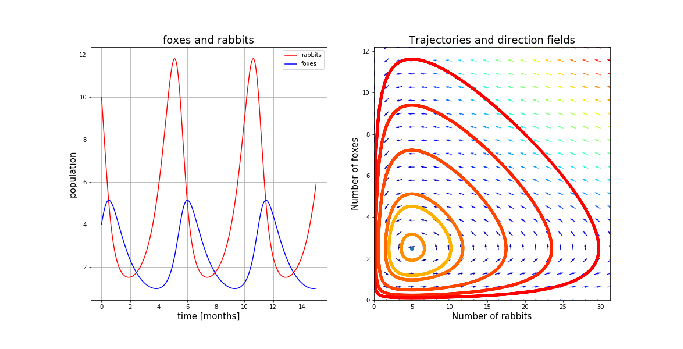

In [13]:
fig, ax = plt.subplots(figsize=(12,12))
img = mpimg.imread('rabbits_and_foxes_quiz.png')
ax.imshow(img)
    
Q=ax.axis('off')

display(Q2)
display(Q3)
display(Q1)
#display(VBox([Q1,Q2,Q3]))

In [14]:
%matplotlib inline

out = Output(layout={'width': '60%'})

N = 100000  # initial population size
I = 10       # initial infected
R = 0        # initial removed

def update_plot(a,b): 
    
    with out: 
        clear_output(wait=True) # prevents distortions
        
        fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

        def dX_dt(X, t=0):
            """ Return the susceptible and infected population. """
            return array([ -   a*X[0]*X[1]/N ,              # susceptible
                               a*X[0]*X[1]/N - b*X[1],      # infected
                                               b*X[1]])     # removed
        #t = linspace(0, 90,  180)              # time
        t=np.arange(0,90,0.5)
        X0 = array([N, I,R])                     # initials conditions: 10 susceptible and 0 infected
        X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
        susceptible, infected,removed = X.T        

        scat, = ax1.plot(t, susceptible,'r-',label='susceptible',linewidth=4)
        scat, = ax1.plot(t, infected,'b-',label='infected',linewidth=4)
        scat, = ax1.plot(t, removed,'k-',label='removed',linewidth=4)
        ax1.legend(loc='best')
        ax1.grid()
        ax1.set_title('susceptible and infected part of the population',fontsize=18)
        ax1.set_xlabel('time [days]', fontsize=15)
        ax1.set_ylabel('population', fontsize=15)
        ax1.set_title('susceptible and infected',fontsize=18)

        # we are on this line:
        # V = delta*x -gamma*ln(x) + beta*y - alpha*ln(y)
        #our_V = c*X0[0] -d*log(X0[0]) + b*X0[1] - a*log(X0[1])
        # ---------------------------------------------------------
        values  = linspace(0.33, 2, 6)                          # position of the orbits around our initial conditions
        
                
        vcolors = plt.cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory
        #X_f0 = array([     0. ,  0.])
        #X_f1 = array([ d/c, a/b])  # stable point (equilibrium)
        #equil = "equilibrium point = (" + str(X_f1[0]) + "," + str(X_f1[1]) + ")"
    
        #------------------------------------------------------------------
        # plot trajectories
        for v, col in zip(values, vcolors):
        
            #X0 = v * X_f1                               # starting point
            X_0 = v*X0                               # starting point
            X = integrate.odeint( dX_dt, X_0, t)         # we don't need infodict here
            ax2.plot( X[:,0], X[:,1], lw=5.0, color=col, label='X0=(%.f, %.f)' % ( X_0[0], X_0[1]) )

        # location of the equilibrium point     
        #ax2.plot(X_f1[0],X_f1[1],'o')    
        
        #-------------------------------------------------------
        # define a grid and compute direction at each point
        ymax = plt.ylim(ymin=0)[1]                        # get axis limits
        xmax = plt.xlim(xmin=0)[1]
        nb_points   = 20

        x = linspace(0, xmax, nb_points)
        y = linspace(0, ymax, nb_points)

        X1 , Y1  = meshgrid(x, y)                       # create a grid
        DX1, DY1, DZ1 = dX_dt([X1, Y1])                 # compute growth rate on the grid (for S,I,R)
        M = (hypot(DX1, DY1))                           # Norm of the growth rate 
        M[ M == 0] = 1.                                 # Avoid zero division errors 
        DX1 /= M                                        # Normalize each arrows
        DY1 /= M

        ax2.set_title('Trajectories and direction fields',fontsize=18)
        plt.xticks(np.arange(0, N, 0.25*N))
        ax2.set_xlabel('Number of Susceptible', fontsize=15)
        ax2.set_ylabel('Number of Infected',fontsize=15)
        Q=ax2.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.jet)
        
        fig.tight_layout()
        plt.show()
        fig.savefig('susceptible_and_infected.png')

        
        
headertextbox = HTML(value="""
<div class="container">
<img src="https://raw.githubusercontent.com/bigfooted/covid19-seir/master/coronavirus_cropped.jpg" alt="corona" style="width:100%;margin:-8px 0px">
   <div class="centered">
          <font size="10">
          SIR model of a virus outbreak
              </font> 
     </div>
</div>
    """)



textbox = HTMLMath(
value="""<body><font size="4"> Classic SIR model: Kermack-McKendrick: <br> \
        $$\\dot S = -\\beta I S/N$$<br> \
        $$\\dot I = +\\beta I S/N - \\gamma I $$ <br> \
        $$\\dot R = \\gamma I$$ <br> \
        $S(t)$ : number of Susceptible persons (persons that are not infected or immune) <br> \
        $I(t)$ : number of Infected persons <br> \
        $R(t)$ : number of Removed persons (immune or dead) <br> \
        $N = S+I+R$ : total population <br> \
        $\\beta=1/T_l$ : infection rate = inverse of latent period <br> \
        $\\gamma=1/T_r$ : recovery rate = inverse of recovery time.  <br> \
        A virus can spread when the number of infections increases: $\\dot I>0$. This means that S=N, <br><br>\
        $$R_0 = \\beta / \\gamma > 1$$ \
        </font></body> 
       """
    ,layout=Layout(width='30%')
)


# to do: an output box displaying the location of the equilibrium plot


layout=Layout(border='0px solid black', width='400px',height='50px')

style = {'description_width': '150px','width':'500px'}
sliderInfectionrate = FloatSlider(min=0.2, max=2.0, step=0.1, value=0.4, description="infection rate:",orientation='horizontal',style=style,layout=layout) 
sliderRecoveryrate = FloatSlider(min=0.02, max=0.5, step=0.01, value=0.2, description="recovery rate:",orientation='horizontal',style=style,layout=layout) 
#l = link((sliderInfectionrate, 'value'), (textbox_R0, 'value'))

r0 = Output(
    layout={'width': '90%'}
)
def update_R0(a,b):
    with r0:
        clear_output(wait=True)
        # update the text
        print("      Basic reproduction number R0 = {a:2.2f}".format(a=(sliderInfectionrate.value/sliderRecoveryrate.value)))
        


sliders = interactive(update_plot,a=sliderInfectionrate,b=sliderRecoveryrate)
textr0 = interactive(update_R0,a=sliderInfectionrate,b=sliderRecoveryrate)

update_plot(a=0.4,b=0.2) # to show the initial plot
update_R0(a=0.4,b=0.2)   # to show the initial R0
display(VBox([headertextbox,HBox([out, VBox([sliderInfectionrate,sliderRecoveryrate, r0],layout=Layout(width='30%')), textbox])]))


In [15]:
import csv

country="Hubei"

# ********** confirmed cases **********
#
# data from John hopkins CSSE centre for system science and engineering
f_confirmed = open('/home/nijso/jupyternotebooks/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', 'r') 
csv_f_confirmed = csv.reader(f_confirmed)
header = f_confirmed.readline()
headerlist = header.split(',')
dates = headerlist[5:len(headerlist)]
for row in csv_f_confirmed:
    if (row[0]==country):
        confirmeddata=list(map(int,row[5:len(row)]))
        

# ********** recovered cases **********
#
#
f_recovered = open('/home/nijso/jupyternotebooks/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv', 'r') 
csv_f_recovered = csv.reader(f_recovered)
header = f_recovered.readline()
headerlist = header.split(',')
dates = headerlist[5:len(headerlist)]
for row in csv_f_recovered:
    if (row[0]==country):
        recovereddata=list(map(int,row[5:len(row)]))
        

# ********** death cases **********
#
#
f_deaths = open('/home/nijso/jupyternotebooks/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv', 'r') 
csv_f_deaths = csv.reader(f_deaths)
header = f_deaths.readline()
headerlist = header.split(',')
dates = headerlist[5:len(headerlist)]


for row in csv_f_deaths:
    if (row[0]==country):
        deathdata=list(map(int,row[5:len(row)]))

        
# ------------------------------------------------------------------------- #        
%matplotlib inline

out = Output(layout={'width': '60%'})

def update_plot(a,b): 
    
    with out: 
        clear_output(wait=True) # prevents distortions
        
        fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

        t = np.arange(0, len(confirmeddata), 1)
        # actual infected is confirmed minus recovered and death
        infected = [x-y-z for x, y,z in zip(confirmeddata,recovereddata,deathdata)]
        # removed is recovered and deaths
        removed = [x+y for x,y in zip(recovereddata,deathdata)]
        plt.rcParams["figure.figsize"] = [10,10]
        #plt.plot(t, confirmeddata,'bs',deathdata,'rs',recovereddata,'gs',infected,'bd',Removed,'r-')
        plt.bar(t,confirmeddata,color='#888888',edgecolor='#666666',width=1,alpha=1.0)
        #plt.bar(t,recovereddata,color='#aaaaaa',edgecolor='#888888',width=1)
        plt.bar(t,infected,color='#eeeeee',edgecolor='#888888',width=1,alpha=0.5)
        plt.bar(t,removed,color='#cccccc',edgecolor='#888888',width=1,alpha=0.5)
        plt.title('COVID-19 outbreak data of Hubei (with capital Wuhan), China')
        plt.legend(['confirmed (cumulative)','infected','removed (recovered+deaths)'])
        plt.xlabel('days')
        plt.ylabel('confirmed cases')
        plt.show()

        
        
# ---------------------------------------------------------------------------- #        
headertextbox = HTML(value="""
<div class="container">
<img src="https://raw.githubusercontent.com/bigfooted/covid19-seir/master/coronavirus_cropped.jpg" alt="corona" style="width:100%;margin:-8px 0px">
   <div class="centered">
          <font size="10">
          SIR model of a virus outbreak
              </font> 
     </div>
</div>
    """)


textbox = HTMLMath(
value="""<body><font size="4"> Data from John Hopkins University, online git repository: <br><br> \
        <font color = "blue"><a href = "https://github.com/CSSEGISandData/COVID-19">https://github.com/CSSEGISandData/COVID-19</a> </font><br><br>
        Country (and sometimes, province) data on confirmed infections, recoveries and deaths available. \
        Shown here is the data of the province of Hubei, China, the only location where the breakout was successfully halted. <br>
        We can fit our SIR model with the data using <i>machine learning.</i> We can use the CSSE country data as training data in a constrained optimization algorithm to find the best $\\beta$ and $\\gamma$. \
        Here, we will use the data set shown as an example. We will use the classic <b>BFGS</b> algorithm, which is a quasi-Newton method.
        </font></body> 
       """
    ,layout=Layout(width='30%')
)

update_plot(a=0.4,b=0.2) # to show the initial plot
display(VBox([headertextbox,HBox([out, textbox])]))


In [17]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
# for nan
import math

N = 90000
E_0 = 400
I_0 = 100
R_0 = 0
S_0 = N - E_0 - I_0 - R_0

# number of days future prediction
predict_range = 90

START_DATE = {
  'Japan': '1/22/20',
  'Italy': '1/31/20',
  'Hubei': '1/22/20',
  'France': '1/25/20',  
  'Netherlands': '2/27/20',  
  'Belgium': '2/25/20',
  'Germany': '2/19/20',
  'US': '3/3/20'
}

# ------------------------------------------------------------------------------------ #            
class Learner(object):
    def __init__(self, country, loss):
        self.country = country
        self.loss = loss

    def load_confirmed(self, country):
      df = pd.read_csv('/home/nijso/jupyternotebooks/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
      country_df = df[df['Country/Region'] == country]
      # notice that with :-1 we remove the last entry, we do this because sometimed the last entry is not filled in yet
      return country_df.iloc[0].loc[START_DATE[country]:][:-1]

    def load_recovered(self, country):
      df = pd.read_csv('/home/nijso/jupyternotebooks/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
      country_df = df[df['Country/Region'] == country]
      return country_df.iloc[0].loc[START_DATE[country]:][:-1]

    def load_death(self, country):
      df = pd.read_csv('/home/nijso/jupyternotebooks/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
      country_df = df[df['Country/Region'] == country]
      return country_df.iloc[0].loc[START_DATE[country]:][:-1]

# ------------------------------------------------------------------------------------ #            
    def setup(self):
        confirmed = self.load_confirmed(self.country)
        recovered = self.load_recovered(self.country)
        death = self.load_death(self.country)
        infected = [x-y-z for x, y,z in zip(confirmed,recovered,death)]
        removed = [x+y for x,y in zip(recovered,death)]
        cconfirmed = np.asarray(confirmed)
        crecovered=np.asarray(recovered)
        index = confirmed.index
        x=np.arange(len(confirmed.index))

# ------------------------------------------------------------------------------------ #            
    def extend_index(self, index, new_size):
        values = index.values
        current = datetime.strptime(index[-1], '%m/%d/%y')
        while len(values) < new_size:
            current = current + timedelta(days=1)
            values = np.append(values, datetime.strftime(current, '%m/%d/%y'))
        return values

# ------------------------------------------------------------------------------------ #        
    def predict(self, beta, sigma,gamma, infected, recovered, country):
        size=len(infected)
        def SEIR(t, y):
            S = y[0]
            E = y[1]
            I = y[2]
            R = y[3]
            return [-beta*S*I/N, beta*S*I/N - sigma*E, sigma*E - gamma*I,gamma*I]
        return solve_ivp(SEIR, [0, size], [S_0,E_0,I_0,R_0], t_eval=np.arange(0, size, 1))

# ------------------------------------------------------------------------------------ #        
    def train(self,weightfactor):
        #print("start optimizing SIR coefficients")
        confirmed = self.load_confirmed(self.country)
        new_index = self.extend_index(confirmed.index, predict_range)
        recovered = self.load_recovered(self.country)
        death = self.load_death(self.country)
        
        c = np.asarray(confirmed)
        r = np.asarray(recovered)
        d = np.asarray(death)
        
        infected = [x-y-z for x, y,z in zip(c,r,d)]
        removed = [x+y for x,y in zip(r,d)]

        if math.isnan(infected[len(infected)-1]):
            print("isnan")
            del infected[-1]
            del removed[-1]
            del recovered[-1]
            del confirmed[-1]
        
        #optimal = minimize(loss, [0.001, 0.001], args=(confirmed, recovered), method='L-BFGS-B', bounds=[(0.00000001, 0.4), (0.00000001, 0.4)])
        #scipy.optimize.minimize(fun, x0, args=(), 
        # method='L-BFGS-B', 
        # jac=None, 
        # bounds=None, 
        # tol=None, 
        # callback=None, 
        # options={'disp': None, 'maxcor': 10, 'ftol': 2.220446049250313e-09, 'gtol': 1e-05, 'eps': 1e-08, 'maxfun': 15000, 'maxiter': 15000, 'iprint': -1, 'maxls': 20})
        #opts = {'disp': None, 'iprint':1,'eps':1.0e-8,'gtol':1.0e-5,'maxfun':15000,'maxiter':15000,'maxls':20,'maxcor':10}    
        opts = {'disp': None, 'iprint':1,'eps':1.0e-9,'gtol':1.0e-6,'maxfun':15000,'maxiter':15000,'maxls':50,'maxcor':20}    
        optimal = minimize(loss, [0.01, 0.1, 0.2], args=(weightfactor,infected, removed), method='L-BFGS-B', bounds=[(0.00000001, 10), (0.1, 10), (0.0001,10)],options=opts)
        print("optimal = ",optimal)
        
        
        beta, sigma, gamma = optimal.x
        print("R0 = ",beta/gamma)
        prediction = self.predict(beta, sigma, gamma, infected, removed, self.country)

        index = confirmed.index
        x=np.arange(len(new_index))
        
        #fig = plt.figure()
        #ax = plt.subplot(111)
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

        plt.rcParams["figure.figsize"] = [16,16]
        plt.rcParams["axes.linewidth"] = 2.0
        plt.rcParams['lines.linewidth'] = 5
        plt.rcParams['lines.markersize'] = 10
        plt.rcParams['lines.markeredgecolor'] = 'black'
        plt.rcParams['font.size'] = 16
        plt.rcParams['axes.labelsize'] = 16
        plt.rcParams['axes.labelweight'] = 'bold'
        plt.rcParams['xtick.labelsize'] = 14
        plt.rcParams['ytick.labelsize'] = 14
        plt.rcParams['legend.fontsize'] = 12
        plt.rcParams['figure.titlesize'] = 12
        plt.xticks(x[::7], new_index[::7], rotation=45)
        #plt.plot(index,confirmed,'o',label='cumulative actual')        
        plt.plot(index,infected, 'go',label='total infected I')
        plt.plot(index,removed, 'ro',label='total removed R')
        plt.plot(index,recovered,'o',label='total recovered')
        plt.plot(index,death, 'o',label='total deaths')
        #plt.plot(prediction.y[0],label='predicted susceptible S')
        plt.plot(prediction.y[2],'g-',label='predicted infected I')
        plt.plot(prediction.y[3],'r-',label='predicted removed R')
        ax.legend(loc='upper left', frameon=False)
        plt.show()
        #print(f"country={self.country}, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
        #fig.savefig(f"{self.country}.png")
        #print("end optimizing SID coefficients")
        
# ------------------------------------------------------------------------------------ #        
# the loss function that needs to be minimized
def loss(point, weightfactor,infected, removed):
    size = len(infected)
    beta, sigma, gamma = point
    
    def SEIR(t, y):
        S = y[0]
        E = y[1]
        I = y[2]
        R = y[3]
        return [-beta*S*I/N, beta*S*I/N - sigma*E, sigma*E - gamma*I, gamma*I]
    solution = solve_ivp(SEIR, [0, size], [S_0,E_0,I_0,R_0], t_eval=np.arange(0, size, 1), vectorized=True)
    # difference between computed infected and WHO-data infected
    l1 = np.sqrt(np.mean((solution.y[2] - infected)**2))
    # difference between computed removed and WHO-data recovered
    l2 = np.sqrt(np.mean((solution.y[3] - removed)**2))
    return weightfactor * l1 + (1.0 - weightfactor) * l2


       
# ------------------------------------------------------------------------- #        

out = Output(layout={'width': '60%'})

def update_plot(a,b): 
    
    with out: 
        clear_output(wait=True) # prevents distortions
        
        #print("***** TRAINING: Hubei *****")
        learner = Learner('Hubei', loss)
        learner.setup()
        learner.train(0.68)

        
        
# ---------------------------------------------------------------------------- #        
headertextbox = HTML(value="""
<div class="container">
<img src="https://raw.githubusercontent.com/bigfooted/covid19-seir/master/coronavirus_cropped.jpg" alt="corona" style="width:100%;margin:-8px 0px">
   <div class="centered">
          <font size="10">
          SIR model of a virus outbreak
              </font> 
     </div>
</div>
    """)


textbox = HTMLMath(
value="""<body><font size="4"> The figure shows a comparison between the CSSE data and the SIR model with the model coefficients from the optimizer<br><br> \
        All computations are contained in this notebook! <br><br>
        We see that we get a reasonable match with the number of infected persons, and a larger discrepancy in the model predictions of the recovery. \
        We predict a faster recovery compared to the data. <br>
        Our latent period is 1/0.35 = 3 days and our recovery time is 1/0.056 = 18 days <br>
        From the WHO website: mean recovery time from hospitalization is 14 days, the mean incubation period is 3-5 days <br><br>
        <b>How can we improve our model?</b>
        </font></body> 
       """
    ,layout=Layout(width='30%')
)

update_plot(a=0.4,b=0.2) # to show the initial plot
display(VBox([headertextbox,HBox([out, textbox])]))

This code shows the 4 different phases in Hubei, where 4 different levels of lockdown were implemented.

In [20]:
import csv

country="Hubei"

# ********** confirmed cases **********
#
# data from John hopkins CSSE centre for system science and engineering
f_confirmed = open('/home/nijso/jupyternotebooks/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', 'r') 
csv_f_confirmed = csv.reader(f_confirmed)
header = f_confirmed.readline()
headerlist = header.split(',')
dates = headerlist[5:len(headerlist)]
for row in csv_f_confirmed:
    if (row[0]==country):
        confirmeddata=list(map(int,row[5:len(row)]))
        

# ********** recovered cases **********
#
#
f_recovered = open('/home/nijso/jupyternotebooks/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv', 'r') 
csv_f_recovered = csv.reader(f_recovered)
header = f_recovered.readline()
headerlist = header.split(',')
dates = headerlist[5:len(headerlist)]
for row in csv_f_recovered:
    if (row[0]==country):
        recovereddata=list(map(int,row[5:len(row)]))
        

# ********** death cases **********
#
#
f_deaths = open('/home/nijso/jupyternotebooks/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv', 'r') 
csv_f_deaths = csv.reader(f_deaths)
header = f_deaths.readline()
headerlist = header.split(',')
dates = headerlist[5:len(headerlist)]


for row in csv_f_deaths:
    if (row[0]==country):
        deathdata=list(map(int,row[5:len(row)]))

        
# ------------------------------------------------------------------------- #        
%matplotlib inline

out = Output(layout={'width': '60%'})

def update_plot(a,b): 
    
    with out: 
        clear_output(wait=True) # prevents distortions
        
        fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

        
        t = np.arange(0, len(confirmeddata), 1)


        # actual infected is confirmed minus recovered and death
        infected = [x-y-z for x, y,z in zip(confirmeddata,recovereddata,deathdata)]
        # removed is recovered and deaths
        removed = [x+y for x,y in zip(recovereddata,deathdata)]

        plt.rcParams["figure.figsize"] = [10,10]

        #plt.plot(t, confirmeddata,'bs',deathdata,'rs',recovereddata,'gs',infected,'bd',Removed,'r-')

        plt.bar(t[0:2],confirmeddata[0:2],color='#ff7f0e',edgecolor='#666666',width=1,alpha=1.0)
        plt.bar(t[2:12],confirmeddata[2:12],color='#9467bd',edgecolor='#666666',width=1,alpha=1.0)
        plt.bar(t[12:25],confirmeddata[12:25],color='#e377c2',edgecolor='#666666',width=1,alpha=1.0)
        plt.bar(t[25:50],confirmeddata[25:50],color='#bcbd22',edgecolor='#666666',width=1,alpha=1.0)

        plt.legend(['phase I','phase II','phase III', 'phase IV'])
        plt.xlabel('days')
        plt.ylabel('confirmed cases')

        plt.show()

        
        
# ---------------------------------------------------------------------------- #        
headertextbox = HTML(value="""
<div class="container">
<img src="https://raw.githubusercontent.com/bigfooted/covid19-seir/master/coronavirus_cropped.jpg" alt="corona" style="width:100%;margin:-8px 0px">
   <div class="centered">
          <font size="10">
          SIR model of a virus outbreak
              </font> 
     </div>
</div>
    """)


textbox = HTMLMath(
value="""<body><font size="4"> In Hubei, 4 different phases can be identified: <br><br>
        <ul>
        <li>phase I: no action taken</li><br>
        <li>phase II: public transport and public events halted; start of quarantine measures</li><br>
        <li>phase III: Enhanced quarantine and isolation measures </li><br>
        <li>phase IV: Very restrictive measures </li><br>
        </ul>
        This means that the infection rate $\\beta$ is changing over time! <br>
        <b>Exercise: change the optimization routine to take the 4 phases into account</b><br>
        Also note that the data itself can be incomplete or faulty.
        </font></body> 
       """
    ,layout=Layout(width='30%')
)

update_plot(a=0.4,b=0.2) # to show the initial plot
display(VBox([headertextbox,HBox([out, textbox])]))




<html>
<body>   
<table style="width:100%;height:600px";>
<tr>
    <td style="background-color:#eeeeee;color:#5dade2;text-align:center";>
    <ul style="list-style-type:none;">    
        <li><img src="1200px-Jupyter_logo.svg.png",height=300, width=300 ></li>
        <li><font size="10"><centering>Jupyter notebooks in the (virtual) classroom</centering></font></li>
      </ul>  
    </td>
    <td style="background-color:#eeeeee;">
        <font size="5">
            What have we learned?
        <ul> 
            <li>Introduction to Jupyter notebooks for online, interactive web-based learning</li>
            <li>Checked pre-existing knowledge on ODE systems with Predator-Prey model</li>
            <li>Introduced the SIR model as a canonical model to predict a virus outbreak</li>
            <li>Coupled online cloud data of the current COVID-19 outbreak to verify our SIR model</li>
            <li>Used an optimization algorithm to estimate the model coefficients of the SIR model</li>
            <li>Reflected on the shortcomings of the SIR model</li>
        </ul>  
        </font>    
    </td>
</tr>
</table>
</body>
</html>    
